This is the notebook dedicated to running our models

Gather the dataset and imports

In [1]:
import sys
import os
import torch
import torch.optim as optim
import torch.nn as nn
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from data.data_preprocessing import MRIDataset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import pickle

# Applying random transformations to vary data
transformations = transforms.Compose([
    transforms.RandomRotation(15),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip()
])

# Data preloaded from pickle file
data_path = os.path.abspath(os.path.join("..", "data", "archive", "brain_tumor_mri", "new_dataset", "training_data.pickle"))
with open(data_path, 'rb') as file:
    loaded_data = pickle.load(file)

# Unpacking the data into the images and their corresponding labels
images, labels = zip(*loaded_data)
dataset = MRIDataset(images, labels, transformations, model_type=None)

# Splitting the dataset into training and testing
training_size = int(.8 * len(dataset))
testing_size = len(dataset) - training_size
training_dataset, testing_dataset = random_split(dataset, [training_size, testing_size])

# Two separate loaders for training and testing
train_loader = DataLoader(training_dataset, batch_size=16, shuffle=True)
testing_loader = DataLoader(testing_dataset, batch_size=16, shuffle=True)

# Debug comment out later
for sample_image, sample_label in train_loader:
    print(f"Image shape: {sample_image.shape}")
    print(f"Label: {sample_label}")
    break


Image shape: torch.Size([16, 1, 512, 512, 3])
Label: tensor([3., 1., 3., 2., 1., 2., 2., 3., 1., 1., 2., 3., 2., 3., 3., 2.])


Run the 3D CNN model

Batch number 0, Loss: 1.1947848796844482
Batch number 1, Loss: 698.8853149414062
Batch number 2, Loss: 1965.3525390625
Batch number 3, Loss: 444.9983825683594
Batch number 4, Loss: 64.56441497802734
Batch number 5, Loss: 311.0757751464844
Batch number 6, Loss: 172.60914611816406
Batch number 7, Loss: 11.3128662109375
Batch number 8, Loss: 15.817623138427734
Batch number 9, Loss: 4.602936744689941
Batch number 10, Loss: 10.678919792175293
Batch number 11, Loss: 1.1674736738204956
Batch number 12, Loss: 3.733656644821167
Batch number 13, Loss: 2.799668550491333
Batch number 14, Loss: 3.1770541667938232
Batch number 15, Loss: 3.5857937335968018
Batch number 16, Loss: 3.4067602157592773
Batch number 17, Loss: 2.649038076400757
Batch number 18, Loss: 1.4478696584701538
Batch number 19, Loss: 3.610896110534668
Batch number 20, Loss: 2.7774834632873535
Batch number 21, Loss: 1.5111078023910522
Batch number 22, Loss: 2.62743878364563
Batch number 23, Loss: 1.9196717739105225
Batch number 24, L

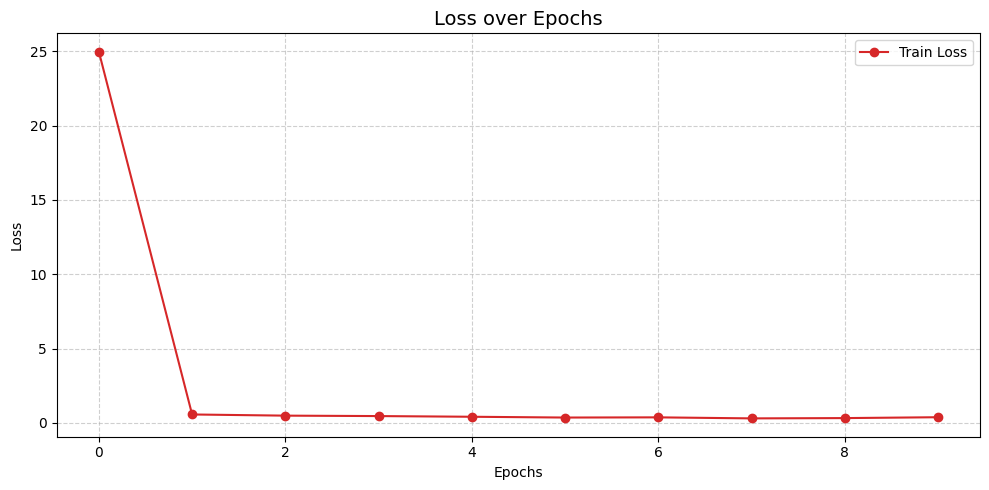

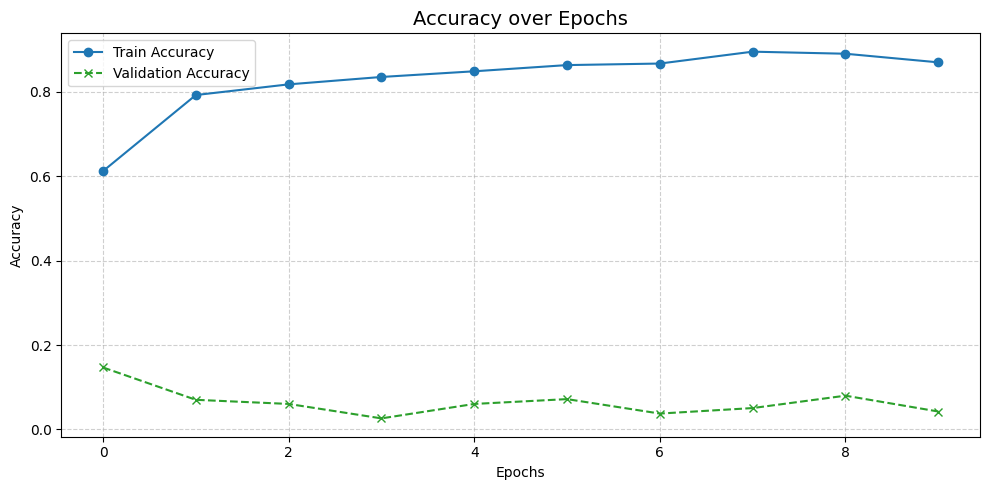

In [3]:
from models.CNN_3D.model import CNN_3D
from models.CNN_3D.train import Trainer

# Set up the model, criterion, and optimizer
model = CNN_3D(num_classes=3)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

torch.cuda.empty_cache()
torch.cuda.ipc_collect()
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# Initialize the Trainer class
trainer = Trainer(
    model=model,
    train_loader=train_loader,
    val_loader=testing_loader,
    criterion=criterion,
    optimizer=optimizer,
    num_epochs=10,
    device=torch.device('cuda' if torch.cuda.is_available() else 'cpu'),
)

trainer.train()

Run the ResNet model

In [ ]:
from models.ResNet.model import ResNet
from models.ResNet.train import train

model = ResNet()

Run the Inception model

In [ ]:
from models.Inception.model import Inception
from models.Inception.train import train

model = Inception()

Visualize Models

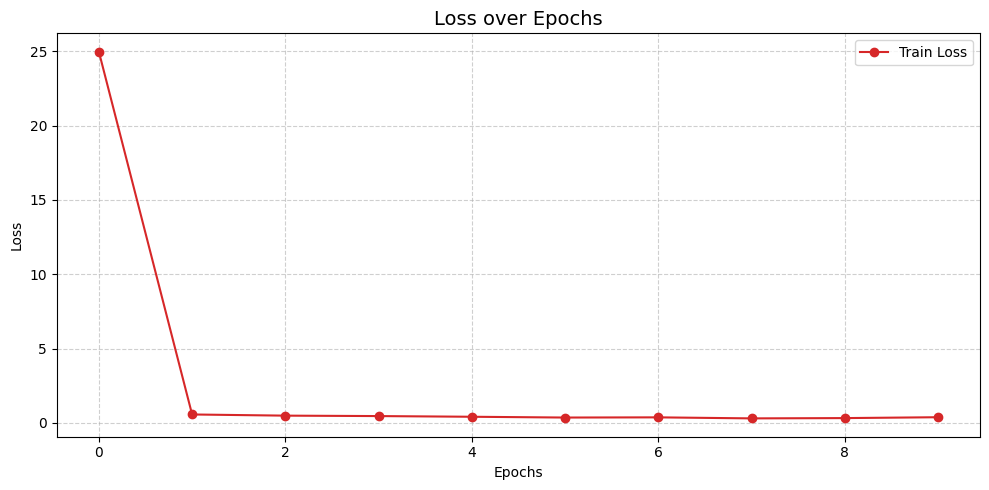

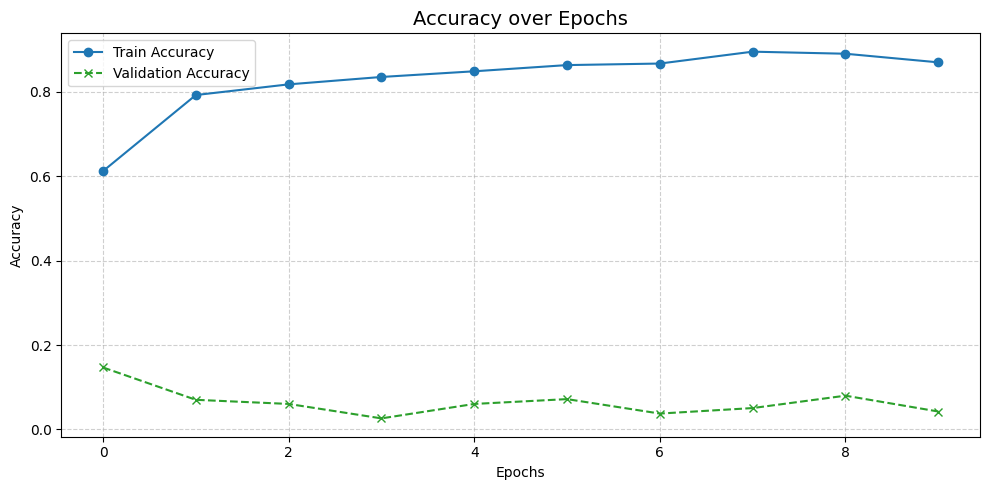

d:\CS 4644 Project\TumorTrace\utils\visualization.py:50: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


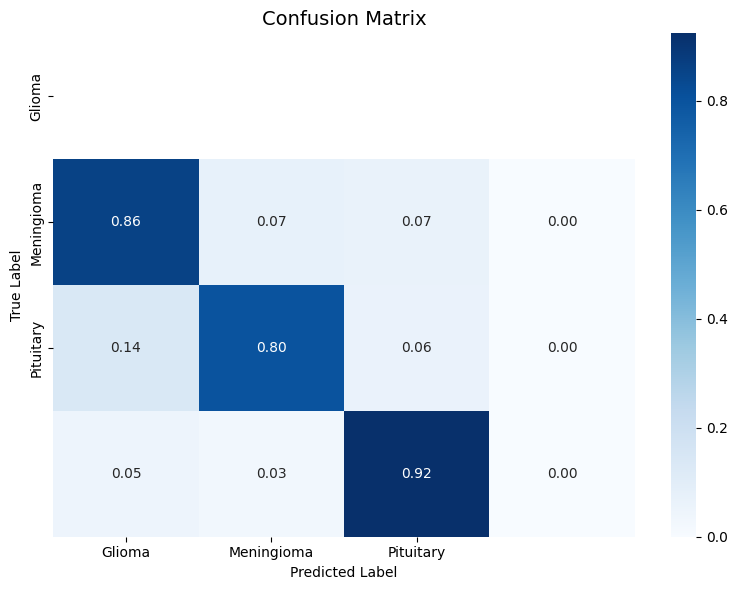

ValueError: Number of classes, 4, does not match size of target_names, 3. Try specifying the labels parameter

In [4]:
# Plot training curves
trainer.visualizer.plot_loss()
trainer.visualizer.plot_accuracy()

# Re-evaluate model and retrieve predictions
val_accuracy, y_true, y_pred = trainer.evaluate(return_preds=True)

# Visualize confusion matrix and classification report
trainer.visualizer.evaluation_summary(y_true, y_pred)

# Save all plots
trainer.visualizer.save_plots("results/figures/")